In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
#importing df
path = r'/Users/docopeland/04 Instacart Basket Analysis'
ords_prods_merge = pd.read_pickle(os.path.join(path,'02 Data','prepared data','ords_prods_freq_flags.pkl'))

<AxesSubplot:>

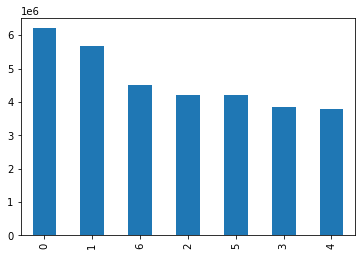

In [6]:
#creating a bar chart for days of week
ords_prods_merge['order_dow'].value_counts().plot.bar()

<AxesSubplot:>

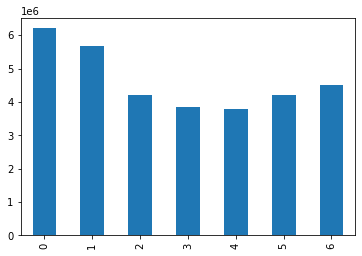

In [7]:
#sorted bar chart
ords_prods_merge['order_dow'].value_counts().sort_index().plot.bar()

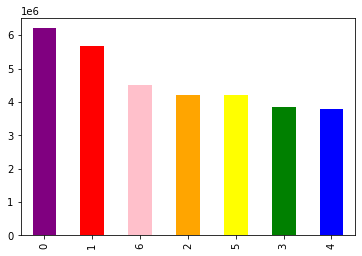

In [10]:
bar = ords_prods_merge['order_dow'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [12]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

<AxesSubplot:ylabel='Frequency'>

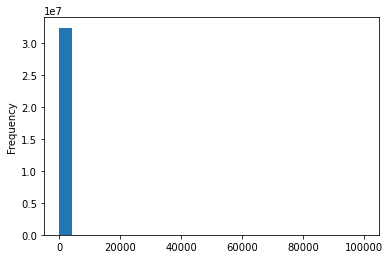

In [13]:
#create a histogram
ords_prods_merge['prices'].plot.hist(bins = 25)

In [14]:
#looking at the ords_prods_merge['prices'] info
ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [15]:
ords_prods_merge['prices'].mean()

11.980225638467232

In [16]:
ords_prods_merge['prices'].median()

7.4

In [17]:
ords_prods_merge['prices'].max()

99999.0

In [19]:
ords_prods_merge['prices'].value_counts(dropna = False).sort_index()

1.0        115143
1.1        242782
1.2        256258
1.3        425691
1.4        392209
            ...  
24.8          410
24.9         5781
25.0        13772
14900.0      4429
99999.0       698
Name: prices, Length: 242, dtype: int64

<AxesSubplot:xlabel='prices', ylabel='prices'>

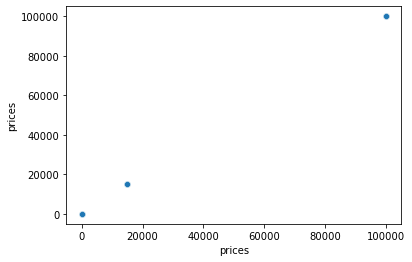

In [20]:
#scatterplot
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [21]:
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,price_range_loc,busiest day,Busiest 2 Days,busiest_period_of_day,max_order,loyalty_flag,user_avg,spender_flag,order_freq,freq_flag
10030345,912404,17,12,2,14,5.0,False,21553,5,0,...,High-range product,Regularly busy,Regulary busy,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030346,603376,17,22,6,16,4.0,False,21553,3,1,...,High-range product,Regularly busy,Regulary busy,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030347,3264360,135,2,2,21,13.0,False,21553,6,0,...,High-range product,Regularly busy,Regulary busy,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030348,892534,135,3,0,8,12.0,False,21553,3,1,...,High-range product,Busiest Day,Busiest 2 days,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030349,229704,342,8,1,19,30.0,False,21553,9,0,...,High-range product,Regularly busy,Busiest 2 days,Average orders,16,Regular customer,114.426619,High spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,29,0,8,4.0,False,33664,1,0,...,High-range product,Busiest Day,Busiest 2 days,Average orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166210,2363282,204099,31,0,9,2.0,False,33664,1,1,...,High-range product,Busiest Day,Busiest 2 days,Most orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166211,3181945,204395,13,3,15,8.0,False,33664,25,0,...,High-range product,Regularly busy,Least busy 2,Most orders,15,Regular customer,451.153540,High spender,5.0,Frequent customer
29166212,2486215,205227,7,3,20,4.0,False,33664,8,0,...,High-range product,Regularly busy,Least busy 2,Average orders,12,Regular customer,1178.381871,High spender,12.0,Regular customer


In [22]:
#making prices higher than $100 NaN
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [23]:
ords_prods_merge['prices'].max()

25.0

In [26]:
ords_prods_merge['prices'].value_counts(dropna = False)

12.3    624261
10.3    510496
4.0     447272
6.3     438467
1.3     425691
         ...  
20.2       123
22.7        99
21.5        85
18.3        11
21.0         8
Name: prices, Length: 241, dtype: int64

<AxesSubplot:ylabel='Frequency'>

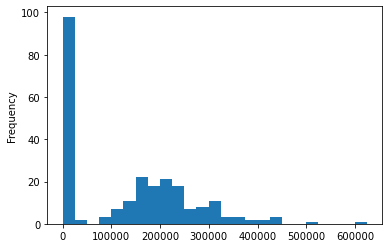

In [24]:
ords_prods_merge['prices'].value_counts(dropna = False).plot.hist(bins = 25)

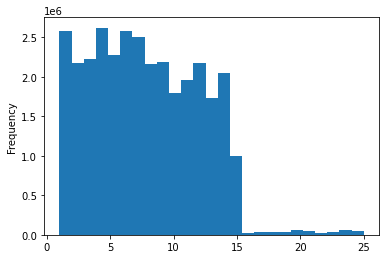

In [28]:
hist = ords_prods_merge['prices'].plot.hist(bins = 25)

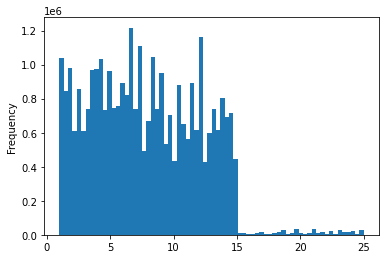

In [29]:
hist2 = ords_prods_merge['prices'].plot.hist(bins = 70)

In [30]:
hist2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_orders_dow.png'))

In [31]:
#creating a sample with a seed of 4 with 70/30
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [33]:
# create a dataframe with all the true values (70%)
big = ords_prods_merge[dev]

In [34]:
#create a dataframe with all the false values (30%)
small = ords_prods_merge[~dev]

In [35]:
#checking the lengths
len(ords_prods_merge) == len(big) + len(small)

True

In [36]:
df2 = small[['order_dow','prices']]

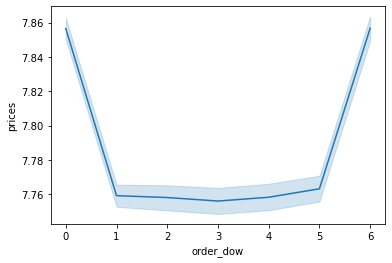

In [39]:
line = sns.lineplot(data = df2, x = 'order_dow',y = 'prices')